In [1]:
import numpy as np
import matplotlib.pyplot as plt


#Định dạng đồ thị
plt.rcParams['figure.figsize'] = (8,8)
plt.style.use('ggplot')

### Data distribute in 3 cluster

In [2]:
#Create 3 samples from the “standard normal” distribution of mean 10 and variance is given
#Khởi tạo 3 mảng ngẫu nhiên theo phân phối chuẩn, phương sai là 10, trung tâm của các mảng đã được định sẵn là (30,30),(80,50),(50,80)

data=10*np.random.randn(200,2)+30 
c1=np.append(10*np.random.randn(200,1)+80, 10*np.random.randn(200,1)+50,axis=1)
c2=np.append(10*np.random.randn(200,1)+50, 10*np.random.randn(200,1)+80,axis=1)

#Combine 3 samples and shuffle them
data=(np.append(data,np.append(c1,c2,axis=0),axis=0))
np.random.shuffle(data)

#The size of our sample is 600x2, it mean the sample contain coordinates of 600 point on plane
print(np.shape(data))

(600, 2)


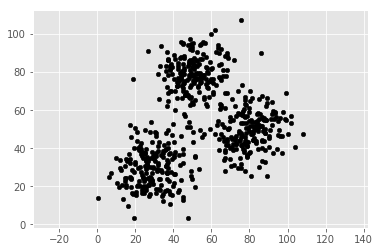

In [3]:
#The plot show how points are located on plane
#Đồ thị biểu biểu các điểm trong data
x=data[:,0]
y=data[:,1]
plt.axis('equal')
plt.scatter(data[:,0],data[:,1],c='black',s=20)

# Our problem divide data points into K cluster by using Kmeans algorithm (I choose K=3 for easy reference)

# There are 5 basic steps in Kmeans algorithm:
#### 1.Choose K random points for the firsts center
#### 2.Base on these centers, the label of data points is defined by the cluster which have nearest center 
#### 3.If the label stays the same, we stop the algorithm
#### 4.Update new centers by averaging the coordinates of data points that cluster
#### 5. Return to step 2

# Now we define those function we used before

In [5]:
#This function return an 600x3 array, contain (cluster 0,1,2) of data point
# If data[i] belongs to cluster 1 then label[i] will be [0,1,0]
 
#Hàm Input data, center. Output label    
    
def label(data,center):
    lab=np.zeros([np.shape(data)[0],np.shape(center)[0]])
    distance=np.zeros(np.shape(center)[0])
    for i in range(np.shape(data)[0]):
        for j in range(np.shape(center)[0]):
            distance[j]=(data[i,0]-center[j,0])**2+(data[i,1]-center[j,1])**2
        lab[i,min_index(distance)]=1
    return lab

In [6]:
#This function return the index of the minimum value in array

#Hàm trả về vị trí của phần tử nhỏ nhất trong mảng
#Hàm này được sử dụng trong Hàm newcenter

def min_index(array):
    index=0
    for i in range(len(array)):
        if (array[i]<array[index]):
            index=i
    return index

In [7]:
#This function base on the recent label to find a new set of centers
# Hàm này sẽ dựa trên nhãn hiện tại để tìm ra một bộ các center mới

def newcenter(data,label):
    cen=np.zeros([np.shape(label)[1],2])
    k=np.zeros([1,np.shape(label)[1]])
    for i in range(np.shape(data)[0]):
        for j in range(np.shape(label)[1]):
            if (label[i,j]==1):
                cen[j,:]+=data[i]
                k[0,j]+=1
                break
    cen=cen/(k.T)
    return cen

In [10]:
#Drawing plot 
#Hàm vẽ hình

def draw(data,nhan,center,d):
    gr=[]
    
    #Draw data points
    for i in range(k):
        nhom=np.empty([0,2])
        for j in range(np.shape(nhan)[0]):
            np.random.seed(5)
            if (nhan[j,i]==1):
                nhom=np.append(nhom,[data[j]],axis=0)
        gr.append(nhom)
    for i in range(len(gr)):
        x=gr[i][:,0]
        y=gr[i][:,1]
        plt.scatter(x,y,c=np.random.rand(1,3),s=20)
    
    #Draw center
    c1=center[:,0]
    c2=center[:,1]
    plt.scatter(c1,c2,c= np.random.rand(1,3),marker='^',s=300)
    
    
    plt.axis('equal')
    plt.show()

Input the number of clusters: 3


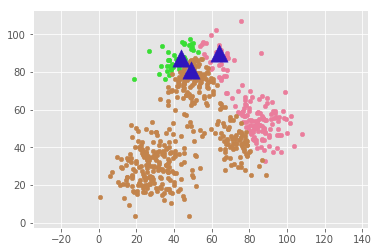

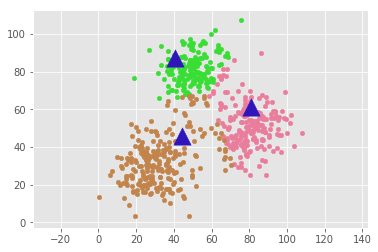

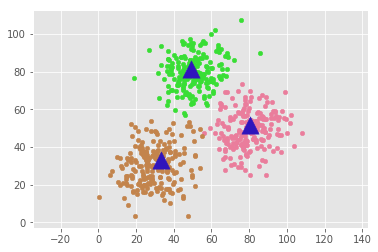

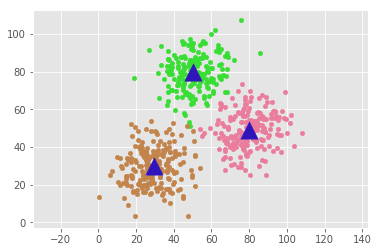

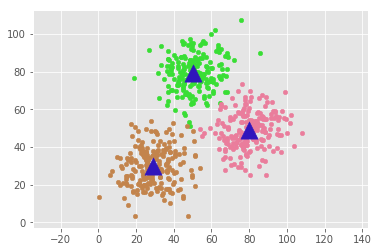

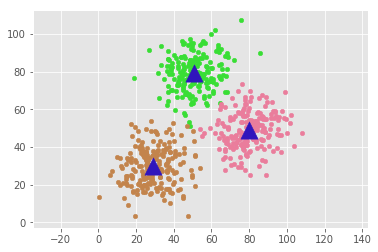

In [11]:
#Input K, we choose k=3
k=int(input('Input the number of clusters: '))


#At first, center is the first k points of data, and from there, we can find the first label
center=data[:k,:]
label_new=label(data,center)

label_old=np.zeros([np.shape(data)[0],2])
d=1
draw(data,label_new,center,0)


#Our algorithm is going inside this while loop
while (np.array_equal(label_new,label_old)==False):
    label_old=np.copy(label_new[:,:])
    center=newcenter(data,label_new)
    label_new=label(data,center)
    
    
    
    #This part is for plotting
    draw(data,label_new,center,d)
    d+=1

### Data distribute randomly

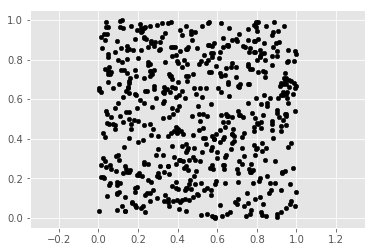

In [17]:
#Khởi tạo mảng ngẫu nhiên 600 phần tử

data=np.random.rand(600,2)

#Đồ thị biểu biểu các điểm trong data
x=data[:,0]
y=data[:,1]
plt.axis('equal')
plt.scatter(data[:,0],data[:,1],c='black',s=20)

### The number of data points in cluster is quite different

### These are some other kind of data distribution, you can run once to see how is data points distribution and re-run the algorithm up there

In [15]:
#Khởi tạo 3 mảng ngẫu nhiên theo phân phối chuẩn, phương sai là 10, trung tâm của các mảng đã được định sẵn là (30,30),(80,50),(50,80)

data=10*np.random.randn(600,2)+30 
c1=np.append(10*np.random.randn(50,1)+80, 10*np.random.randn(50,1)+50,axis=1)
c2=np.append(10*np.random.randn(50,1)+50, 10*np.random.randn(50,1)+80,axis=1)

#Gộp 3 mảng lại và shuffle
data=(np.append(data,np.append(c1,c2,axis=0),axis=0))
np.random.shuffle(data)


#Đồ thị biểu biểu các điểm trong data
x=data[:,0]
y=data[:,1]
plt.axis('equal')
plt.scatter(data[:,0],data[:,1],c='black',s=20)

### Data is not distributed in circle shape

In [ ]:
#Khởi tạo 3 mảng ngẫu nhiên theo phân phối chuẩn, phương sai là 10, trung tâm của các mảng đã được định sẵn là (30,30),(80,50),(50,80)

data=20*np.random.randn(200,2)+60 
c1=np.append(10*np.random.randn(300,1)+130,80*np.random.randn(300,1)+70,axis=1)
c2=np.append(20*np.random.randn(200,1)+60, 20*np.random.randn(200,1)-30,axis=1)

#Gộp 3 mảng lại và shuffle
data=(np.append(data,np.append(c1,c2,axis=0),axis=0))
np.random.shuffle(data)

#Kích thước mảng là 600x2, gồm có tọa độ của 600 điểm trên mặt phẳng
print(np.shape(data))


#Đồ thị biểu biểu các điểm trong data
x=data[:,0]
y=data[:,1]
plt.axis('equal')
plt.scatter(data[:,0],data[:,1],c='black',s=20)

### A cluster is in another cluster

In [23]:
data=np.empty([0,2])

x=np.random.rand(50,1)*2-1
y=(1-x**2)**(1/2)-np.random.rand(50,1)*0.2
data=np.append(data,np.append(x,y,axis=1),axis=0)
data=np.append(data,np.append(x,-y,axis=1),axis=0)
y=np.random.rand(50,1)*2-1
x=(1-y**2)**(1/2)-np.random.rand(50,1)*0.2
data=np.append(data,np.append(x,y,axis=1),axis=0)
data=np.append(data,np.append(-x,y,axis=1),axis=0)


x=np.random.randn(100,2)/8-1/4
data=np.append(data,x,axis=0)


x=np.random.randn(100,2)/8+1/4
data=np.append(data,x,axis=0)


#Trộn data ngẫu nhiên
np.random.shuffle(data)


#Đồ thị biểu biểu các điểm trong data
x=data[:,0]
y=data[:,1]
plt.axis('equal')
plt.scatter(data[:,0],data[:,1],c='black',s=20)